In [1]:
%matplotlib inline

import yfinance as yf
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import datetime as dt
from dateutil.relativedelta import relativedelta

In [2]:
today = dt.datetime.today()
yesterday = today - dt.timedelta(days=1)
end_date = dt.datetime.date(today)
# start_date = end_date - relativedelta(years=19, months=7)
start_date = dt.date(2005, 1, 3)

In [3]:
# initializing parameters
exchange_rates = ['USDTRY=X', 'EURTRY=X', 'GBPTRY=X', 'GC=F']
stock_indices = ['^GSPC', '^IXIC', 'XU100.IS']
data_rates = yf.download(exchange_rates, start=start_date, end=end_date)
data_indices = yf.download(stock_indices, start=start_date, end=end_date)

[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  3 of 3 completed


In [4]:
idx = pd.date_range(
    data_rates.index[0].date(),
    data_rates.index[-1].date()
)
idx

DatetimeIndex(['2005-01-03', '2005-01-04', '2005-01-05', '2005-01-06',
               '2005-01-07', '2005-01-08', '2005-01-09', '2005-01-10',
               '2005-01-11', '2005-01-12',
               ...
               '2024-07-31', '2024-08-01', '2024-08-02', '2024-08-03',
               '2024-08-04', '2024-08-05', '2024-08-06', '2024-08-07',
               '2024-08-08', '2024-08-09'],
              dtype='datetime64[ns]', length=7159, freq='D')

In [5]:
data_rates.index = pd.DatetimeIndex(data_rates.index)
data_rates = data_rates.reindex(idx, fill_value=np.nan).ffill()
data_indices.index = pd.DatetimeIndex(data_indices.index)
data_indices = data_indices.reindex(idx, fill_value=np.nan).ffill()

In [18]:
df = data_indices['Adj Close']
for d in df['XU100.IS'].keys():
    if d.date() < dt.date(2020,7,27):
        df.at[d, 'XU100.IS'] = df.at[d, 'XU100.IS'] / 100

<AxesSubplot: >

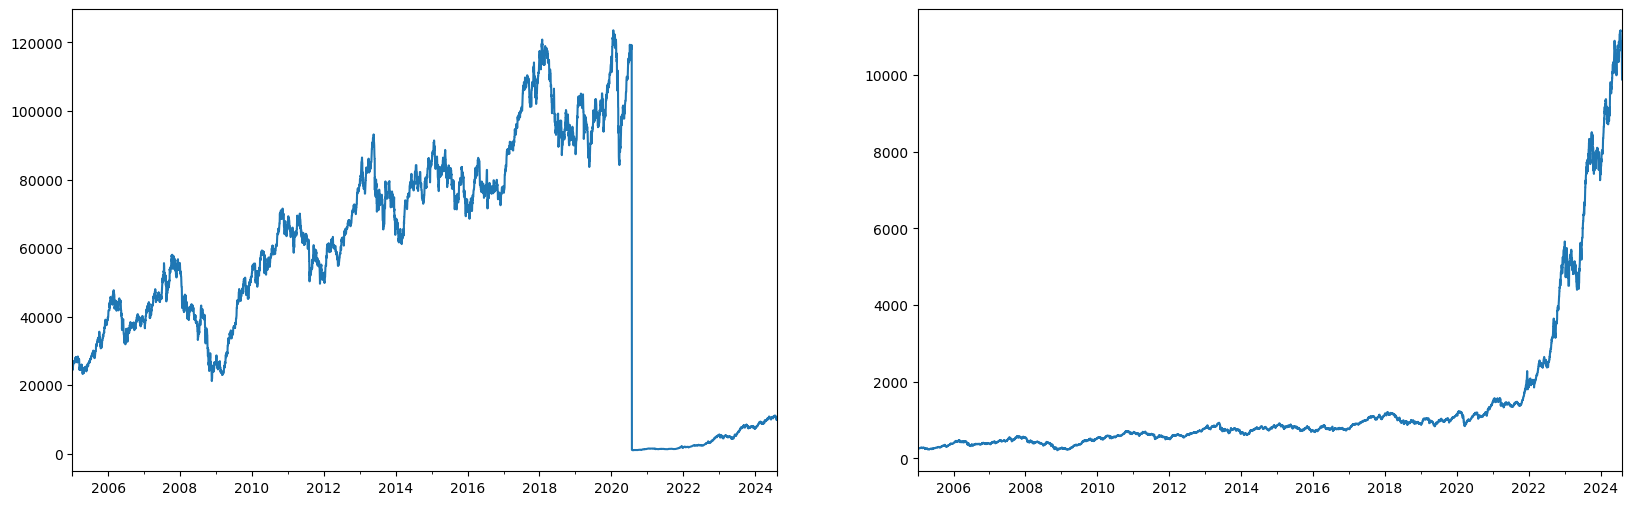

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
data_indices['Adj Close']['XU100.IS'].plot(ax=ax[0])
df['XU100.IS'].plot(ax=ax[1])

In [7]:
pd.DataFrame.to_csv(data_rates, 'try_exchange_rates.csv')
pd.DataFrame.to_csv(data_indices, 'stock_indices.csv')

In [36]:
data = pd.concat([data_rates['Adj Close'], df], axis=1)

Ticker,EURTRY=X,GBPTRY=X,GC=F,USDTRY=X,XU100.IS,^GSPC,^IXIC
2005-01-03,1.809000,2.564600,428.700012,1.344000,254.451992,1202.079956,2152.149902
2005-01-04,1.800500,2.571350,428.500000,1.351000,250.420000,1188.050049,2107.860107
2005-01-05,1.821000,2.592750,426.600006,1.374000,244.229004,1183.739990,2091.239990
2005-01-06,1.833500,2.616200,421.000000,1.392500,245.619004,1187.890015,2090.000000
2005-01-07,1.819000,2.613050,418.899994,1.394000,253.083008,1186.189941,2088.610107
...,...,...,...,...,...,...,...
2024-08-05,36.264519,42.504375,2401.699951,33.245098,9893.400391,5186.330078,16200.080078
2024-08-06,36.528831,42.657169,2389.100098,33.394199,9881.200195,5240.029785,16366.849609
2024-08-07,36.718498,42.627369,2390.500000,33.619202,10024.299805,5199.500000,16195.809570
2024-08-08,36.738590,42.636299,2422.199951,33.512329,10098.500000,5319.310059,16660.019531


In [39]:
# pd.DataFrame.to_csv(data.round(6), 'alldata.csv', index=False, header=False)
pd.DataFrame.to_csv(data.round(6), 'alldata.txt', index=False, header=False, sep=',')